## 아마존 best seller seaweed 상품 

- 데이터 출처: https://www.amazon.com/gp/bestsellers/grocery/14864739011/ref=pd_zg_hrsr_grocery

- sales per month 데이터는 다음 사이트에서 계산해서 추가
https://www.junglescout.com/estimator/



### - 모듈 불러오고 전처리

In [1]:
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns

try:
    import plotly.graph_objs as go
    import plotly.offline as py
except:
    !pip install plotly
    import plotly.graph_objs as go
    import plotly.offline as py

In [2]:
data = pd.read_excel('./data/amazon_seaweed_snacks_product_info.xlsx')

In [3]:
data.head()

,product name,brand,variety pack,num of flavors,flavors,feature,product description,detailed description,ingredients,Non-GMO,...,allergen warnings,packing separately,nums of pack variety,pack of,calories per pack,origin,item weight,Shipping Weight,rank,sales per month
0,Ocean's Halo Seaweed Maui Onion 1 case of 12 u...,Ocean's Halo,0.0,1,"maui onion, sea salt",USDA-Certified Organic Seaweed\nOrganic Season...,Ocean’s Halo was created by Four Dads — two wh...,NaN,"ORGANIC SEAWEED, ORGANIC SUNFLOWER OIL, ORGANI...",1.0,...,0.0,1.0,1.0,12,20,South korea,NaN,1.12 ounces,40.0,150.0
1,Seaweed Love All Natural Roasted Seaweed Varie...,seaweed love,1.0,2,"original, olive oil",All natural;Only 25 calories and 2.5 gram of f...,All natural Roasted seaweed Snack. Our family-...,NaN,"Original Roasted Seaweed : Seaweed, Sesame Oil...",1.0,...,0.0,0.0,1.0,24,25,USA,60g,1.4 pounds,19.0,420.0
2,Hi Termpura (Tempura Seaweed Original) - 1.41o...,Tao Kae Noi,0.0,1,tempura seaweed original,Net weight of each pack:40g/1.41oz\nDelicious ...,Seaweed is grilld int the suitable tempurature...,NaN,"Flour, seaweed, modified tapioca starch, palm ...",0.0,...,0.0,0.0,0.0,1,NaN,Thailand,40g,12.8 Ounces,17.0,480.0
3,Kwangcheonkim Kim Green Laver Seasoned Seaweed...,Kimnori,0.0,1,original,Kwangcheonkim Kim Green Laver Seasoned Seaweed...,Kimnori U.S.A. Inc.\nKimnori U.S.A. Inc. has b...,NaN,"Laver, Canola Oil, Penilla Oil, Seasoned Salt,...",1.0,...,0.0,1.0,0.0,27,10,South korea,135g,14.39 Ounces,14.0,540.0
4,"Annie Chun's Baked Seaweed Crisps, Gochujang F...",Annie Chun's,0.0,3,"gochujang, korean bbq, original",Vegan and Gluten-Free\nRoasted seaweed combine...,Baked Go-chu-jang Flavored Seaweed Crisps\nWe’...,NaN,"Tapioca starch, canola oil, brown rice, seawee...",1.0,...,0.0,0.0,0.0,1,190,South korea,1.27 ounces,1.27 ounces,13.0,540.0


In [ ]:
data.dtypes

product name             object
brand                    object
variety pack            float64
num of flavors            int64
flavors                  object
feature                  object
product description      object
detailed description     object
ingredients              object
Non-GMO                 float64
gluten free             float64
vegan                   float64
allergen warnings       float64
packing separately      float64
nums of pack variety    float64
pack of                  object
calories per pack        object
origin                   object
item weight              object
Shipping Weight          object
rank                    float64
sales per month         float64
dtype: object

In [ ]:
data['variety pack'] = data['variety pack'].astype(str)
data['Non-GMO'] = data['Non-GMO'].astype(str)
data['gluten free'] = data['gluten free'].astype(str)
data['vegan'] = data['vegan'].astype(str)
data['allergen warnings'] = data['allergen warnings'].astype(str)
data['packing separately'] = data['packing separately'].astype(str)

In [ ]:
data.dtypes

product name             object
brand                    object
variety pack             object
num of flavors            int64
flavors                  object
feature                  object
product description      object
detailed description     object
ingredients              object
Non-GMO                  object
gluten free              object
vegan                    object
allergen warnings        object
packing separately       object
nums of pack variety    float64
pack of                  object
calories per pack        object
origin                   object
item weight              object
Shipping Weight          object
rank                    float64
sales per month         float64
dtype: object

## - violin plot

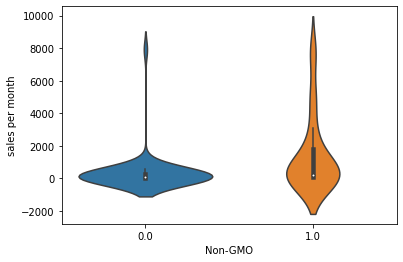

In [ ]:
df = data[~data['Non-GMO'].str.contains('nan')]
sns.violinplot(x="Non-GMO", y="sales per month", data=df)
plt.show()

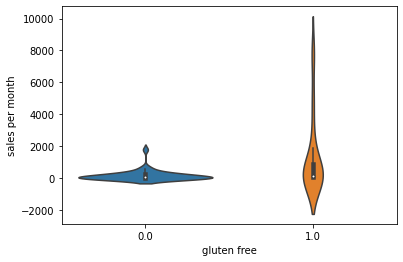

In [ ]:
df = data[~data['gluten free'].str.contains('nan')]
sns.violinplot(x="gluten free", y="sales per month", data=df)
plt.show()

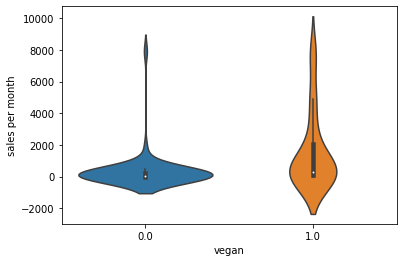

In [ ]:
df = data[~data['vegan'].str.contains('nan')]
sns.violinplot(x="vegan", y="sales per month", data=df)
plt.show()

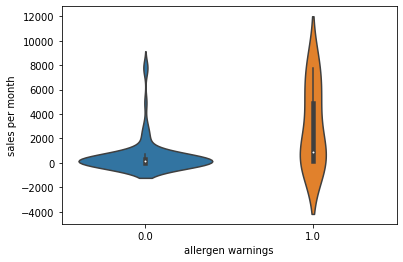

In [ ]:
df = data[~data['allergen warnings'].str.contains('nan')]
sns.violinplot(x="allergen warnings", y="sales per month", data=df)
plt.show()

## - Origin Distribution

In [ ]:
df = data[~data['origin'].isnull()]

x = df['origin'].value_counts().index.values.astype('str')
y = df['origin'].value_counts().values
pct = [("%.2f"%(v*100))+"%"for v in (y/len(data))]

trace1 = go.Bar(x=x, y=y, text=pct)
layout = dict(title= 'Origin Distribution',
              yaxis = dict(title='Count'),
              xaxis = dict(title='Category'))
fig=dict(data=[trace1], layout=layout)
py.iplot(fig)